In [2]:
import pandas as pd
from scripts.evaluate import CiderD
from nltk.translate.bleu_score import corpus_bleu

train = pd.read_csv('./data/train_data.csv',header=None)

<AxesSubplot:>

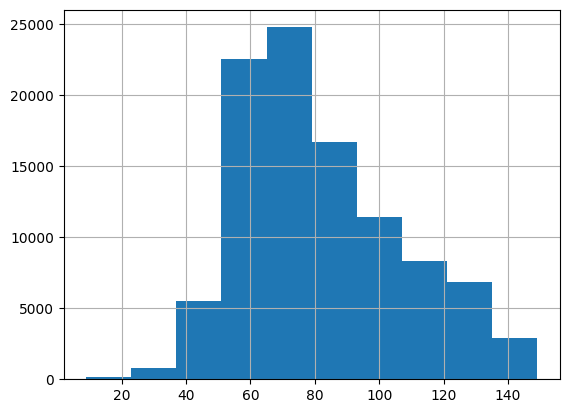

In [21]:
train[1].apply(lambda x: len(x.split())).hist()

<AxesSubplot:>

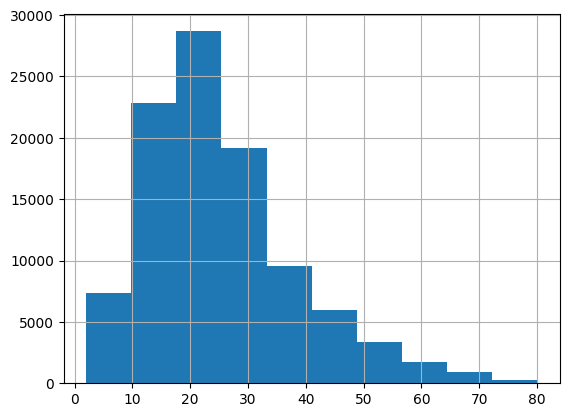

In [71]:
train[2].apply(lambda x: len(x.split())).hist()

In [4]:
from scripts.utils import data4BIO,longest_common_subsequence
i = 0
src = train[1].tolist()[i]
tgt = train[2].tolist()[i]
s,t = data4BIO(src.split(), tgt.split())
print(len(s),len(t),len(src.split()),len(tgt.split()))
' '.join([str(j) for j in s]),' '.join([str(j) for j in t])

54 7 54 7


('0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 0 0 0 0 0 1',
 '1 2 2 2 2 0 1')

In [5]:
from collections import defaultdict

def longest_common_substring(source, target):
    """最长公共子串（source和target的最长公共切片区间）
    返回：子串长度, 所在区间（四元组）
    注意：最长公共子串可能不止一个，所返回的区间只代表其中一个。
    """
    c, l, span = defaultdict(int), 0, (0, 0, 0, 0)
    for i, si in enumerate(source, 1):
        for j, tj in enumerate(target, 1):
            if si == tj:
                c[i, j] = c[i - 1, j - 1] + 1
                if c[i, j] > l:
                    l = c[i, j]
                    span = (i - l, i, j - l, j)
    return l, span

def generate_copy_labels(source, target):
    """构建copy机制对应的label
    """
    mapping = longest_common_subsequence(source, target)[1]
    source_labels = [0] * len(source)
    target_labels = [0] * len(target)
    i0, j0 = -2, -2
    for i, j in mapping:
        if i == i0 + 1 and j == j0 + 1:
            source_labels[i] = 2
            target_labels[j] = 2
        else:
            source_labels[i] = 1
            target_labels[j] = 1
        i0, j0 = i, j
    return source_labels, target_labels

def get_ngram_set(x, n):
    """生成ngram合集，返回结果格式是:
    {(n-1)-gram: set([n-gram的第n个字集合])}
    """
    result = {}
    for i in range(len(x) - n + 1):
        k = tuple(x[i:i + n])
        if k[:-1] not in result:
            result[k[:-1]] = set()
        result[k[:-1]].add(k[-1])
    return result

In [9]:
L = []
srcs = train[1].tolist()
tgts = train[2].tolist()
# for src,tgt in zip(train[1].tolist(),train[2].tolist()):
#     l,_ = longest_common_substring(src.split(),tgt.split())

In [48]:
src = srcs[6]
tgt = tgts[6]
longest_common_substring(src.split(),tgt.split())

(4, (14, 18, 28, 32))

In [49]:
longest_common_subsequence(src.split(),tgt.split())

(14,
 [(4, 0),
  (17, 6),
  (24, 14),
  (50, 21),
  (51, 22),
  (52, 23),
  (54, 25),
  (55, 26),
  (60, 27),
  (61, 28),
  (62, 29),
  (63, 30),
  (65, 40),
  (91, 45)])

In [50]:
tgts[6],srcs[6]

('50 14 116 88 84 59 11 431 26 105 585 474 199 313 11 117 118 316 337 98 122 35 12 74 71 64 56 44 23 21 25 11 124 105 133 134 1249 117 118 50 14 125 130 121 98 10',
 '35 12 48 49 50 30 204 67 40 13 428 438 111 374 23 21 25 11 159 49 50 19 86 294 11 50 30 15 89 11 35 12 120 12 120 12 90 39 27 161 607 40 13 265 43 53 23 21 25 10 35 12 74 741 64 56 905 146 52 43 44 23 21 25 10 14 32 16 1097 39 27 14 47 29 46 69 11 24 42 26 37 61 24 10 1081 33 17 15 13 20 18 10')

In [72]:
L0 = train[2].apply(lambda x: longest_common_substring(x.split(),tgts[6].split())[0])

In [75]:
tgts[111],tgts[6]

('50 14 116 88 84 59 11 253 132 52 242 274 180 50 30 89 99 305 332 10',
 '50 14 116 88 84 59 11 431 26 105 585 474 199 313 11 117 118 316 337 98 122 35 12 74 71 64 56 44 23 21 25 11 124 105 133 134 1249 117 118 50 14 125 130 121 98 10')

In [76]:
srcs[111]

'852 12 85 16 103 19 40 13 116 88 19 494 11 34 12 85 63 16 103 63 16 34 12 74 71 64 56 40 13 52 43 44 23 21 25 49 172 199 59 23 21 706 256 14 397 186 23 21 10 394 42 26 37 61 24 10 80 229 17 15 13 20 18 10'

In [82]:
longest_common_substring(srcs[6].split('10')[0].split(),tgts[6].split())

(4, (14, 18, 28, 32))

In [91]:
longest_common_substring(srcs[111].split('10')[2].split(),tgts[111].split())

(1, (11, 12, 9, 10))

In [78]:
longest_common_substring(srcs[111].split(),tgts[111].split())

(2, (8, 10, 2, 4))

In [73]:
L0[L0==7]

111      7
180      7
554      7
887      7
954      7
        ..
98912    7
98966    7
99216    7
99273    7
99678    7
Name: 2, Length: 689, dtype: int64

In [65]:
longest_common_substring(srcs[1994].split(),tgts[6].split())

(7, (0, 7, 0, 7))

In [69]:
longest_common_substring(srcs[6].split(),tgts[6].split())

(4, (14, 18, 28, 32))

In [66]:
longest_common_substring(srcs[1994].split(),tgts[1994].split())

(2, (26, 28, 8, 10))

In [53]:
srcs[1994],tgts[1994]

('50 14 116 88 84 59 11 35 12 103 163 49 159 49 19 28 86 294 11 263 256 14 108 28 94 27 50 30 13 55 89 99 23 21 25 11 180 132 52 662 232 11 14 32 16 14 39 27 14 29 46 203 70 11 24 42 26 37 61 10 79 46 111 19 15 13 95 19 28 20 18 10 80 33 17 15 13 20 18 10',
 '902 14 88 175 979 79 13 11 50 30 182 89 180 132 242 52 158 232 10')

In [56]:
tgts[1994],tgts[6]

('902 14 88 175 979 79 13 11 50 30 182 89 180 132 242 52 158 232 10',
 '50 14 116 88 84 59 11 431 26 105 585 474 199 313 11 117 118 316 337 98 122 35 12 74 71 64 56 44 23 21 25 11 124 105 133 134 1249 117 118 50 14 125 130 121 98 10')

In [68]:
srcs[6],tgts[6]

('35 12 48 49 50 30 204 67 40 13 428 438 111 374 23 21 25 11 159 49 50 19 86 294 11 50 30 15 89 11 35 12 120 12 120 12 90 39 27 161 607 40 13 265 43 53 23 21 25 10 35 12 74 741 64 56 905 146 52 43 44 23 21 25 10 14 32 16 1097 39 27 14 47 29 46 69 11 24 42 26 37 61 24 10 1081 33 17 15 13 20 18 10',
 '50 14 116 88 84 59 11 431 26 105 585 474 199 313 11 117 118 316 337 98 122 35 12 74 71 64 56 44 23 21 25 11 124 105 133 134 1249 117 118 50 14 125 130 121 98 10')

In [30]:
longest_common_substring(srcs[7320].split(),tgts[7320].split())[1]

(67, 72, 8, 13)

In [27]:
longest_common_substring(srcs[7320].split(),tgts[0].split())[0]

7

In [23]:
longest_common_substring(srcs[20].split(),tgts[20].split())[0]

6

<AxesSubplot:>

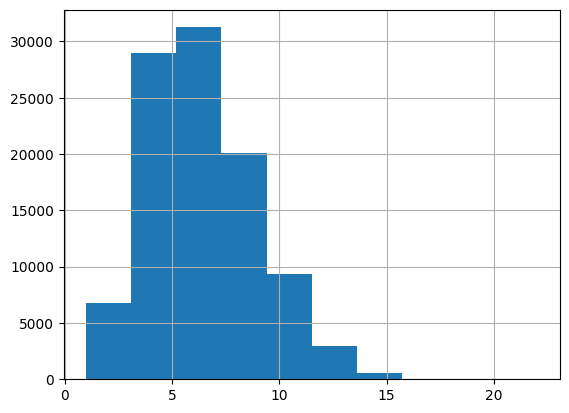

In [35]:
train[1].apply(lambda x: len(x.split('10'))).hist()

<AxesSubplot:>

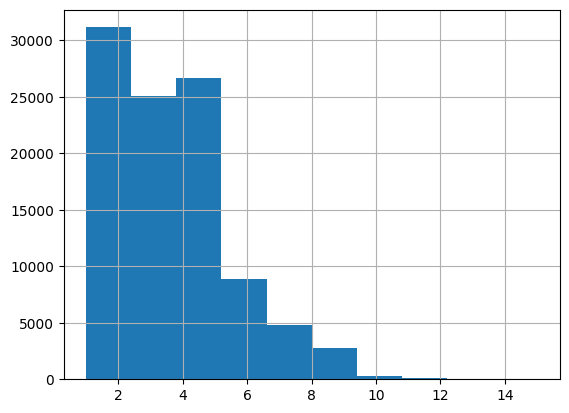

In [34]:
train[2].apply(lambda x: len(x.split('10'))).hist()